In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [4]:
df_video_games=pd.read_csv("D:\\Work\\Aline\\Project_DA_JV\\Fichiers csv\\vgsales_cleaned_franchise_random.csv")

In [5]:
df_video_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21233 entries, 0 to 21232
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             21233 non-null  int64  
 1   Name             21233 non-null  object 
 2   Franchise        21233 non-null  object 
 3   basename         21233 non-null  object 
 4   Genre            21233 non-null  object 
 5   Platform         21233 non-null  object 
 6   Publisher        20652 non-null  object 
 7   Developer        20582 non-null  object 
 8   Year             21204 non-null  float64
 9   Random_Values    21233 non-null  float64
 10  Estimated_Sales  21233 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 1.8+ MB


In [6]:
df_video_games.head()

,Rank,Name,Franchise,basename,Genre,Platform,Publisher,Developer,Year,Random_Values,Estimated_Sales
0,1,Wii Sports,Undefined Franchise,wii-sports,Sports,Wii,Nintendo,Nintendo EAD,2006.0,0.961891,82.86
1,2,Super Mario Bros.,Mario,super-mario-bros,Platform,NES,Nintendo,Nintendo EAD,1985.0,0.648642,40.24
2,3,Mario Kart Wii,Mario,mario-kart-wii,Racing,Wii,Nintendo,Nintendo EAD,2008.0,0.429207,37.14
3,4,PlayerUnknown's Battlegrounds,Undefined Franchise,playerunknowns-battlegrounds,Shooter,PC,PUBG Corporation,PUBG Corporation,2017.0,0.089494,36.60
4,5,Wii Sports Resort,Undefined Franchise,wii-sports-resort,Sports,Wii,Nintendo,Nintendo EAD,2009.0,0.056380,33.09


In [7]:
df_video_games["Publisher"].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
21228    False
21229    False
21230    False
21231    False
21232    False
Name: Publisher, Length: 21233, dtype: bool

In [8]:
df_video_games=df_video_games.dropna(axis=0, how='any')

In [9]:
y=df_video_games['Estimated_Sales']

In [10]:
X=df_video_games.drop(['Estimated_Sales','basename','Name','Developer'], axis=1)


In [11]:
X.head()

,Rank,Franchise,Genre,Platform,Publisher,Year,Random_Values
0,1,Undefined Franchise,Sports,Wii,Nintendo,2006.0,0.961891
1,2,Mario,Platform,NES,Nintendo,1985.0,0.648642
2,3,Mario,Racing,Wii,Nintendo,2008.0,0.429207
3,4,Undefined Franchise,Shooter,PC,PUBG Corporation,2017.0,0.089494
4,5,Undefined Franchise,Sports,Wii,Nintendo,2009.0,0.056380


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)

In [13]:
X_train.columns

Index(['Rank', 'Franchise', 'Genre', 'Platform', 'Publisher', 'Year',
       'Random_Values'],
      dtype='object')

In [14]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(drop = None, handle_unknown = 'ignore', sparse=False)
cat=['Franchise','Genre','Platform','Publisher']
X_train_encoded=ohe.fit_transform(X_train[cat])
X_test_encoded=ohe.transform(X_test[cat])

D:\Work\Aline\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cat_num=['Rank','Year','Random_Values']
X_train_scaled=scaler.fit_transform(X_train[cat_num])
X_test_scaled=scaler.transform(X_test[cat_num])

In [19]:
X_train_scaler=pd.DataFrame(X_train_scaled, columns=['Rank','Year','Random_Values'], index=X_train.index)

In [20]:
X_test_scaler=pd.DataFrame(X_test_scaled, columns=['Rank','Year','Random_Values'], index=X_test.index)

In [21]:
df_train_encoded=pd.DataFrame(X_train_encoded, columns=ohe.get_feature_names_out(), index=X_train.index)

In [22]:
df_test_encoded=pd.DataFrame(X_test_encoded, columns=ohe.get_feature_names_out(), index=X_test.index)

In [23]:
df_X_train=X_train_scaler.merge(df_train_encoded, how="inner", right_index=True, left_index=True)

In [24]:
df_X_test=X_test_scaler.merge(df_test_encoded, how="inner", right_index=True, left_index=True)

In [25]:
df_X_test.head()

,Rank,Year,Random_Values,Franchise_Age of Empires,Franchise_Animal Crossing,Franchise_Assassin's Creed,Franchise_Batman,Franchise_Battlefield,Franchise_Bejeweled,Franchise_BioShock,...,Publisher_althi Inc.,Publisher_bitComposer Games,Publisher_eGames,Publisher_fonfun,Publisher_honeybee,Publisher_iEntertainment Network,Publisher_iMel,Publisher_iWin,Publisher_inXile Entertainment,Publisher_responDESIGN
16213,0.939408,0.395357,-1.314136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19870,1.535525,1.035601,0.115495,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16563,0.996461,0.235296,-1.251442,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4806,-0.920178,-1.525375,-0.098886,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4977,-0.892304,0.075235,-1.663605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
ohe.categories_

[array(['Age of Empires', 'Animal Crossing', "Assassin's Creed", 'Batman',
        'Battlefield', 'Bejeweled', 'BioShock', 'Borderlands', 'Brain Age',
        'Call of Duty', 'Castlevania', 'Civilization', 'Command & Conquer',
        'Counter-Strike', 'Crash Bandicoot', 'Dark Souls', 'Destiny',
        'Devil May Cry', 'Diablo', 'Dragon Ball', 'Dragon Quest',
        'Dying Light', 'Dynasty Warriors', 'FIFA', 'Fallout', 'Far Cry',
        'Final Fantasy', 'Football Manager', 'Frogger', 'Gears of War',
        'God of War', 'Gran Turismo', 'Grand Theft Auto', 'Guitar Hero',
        'Gundam', 'Half-Life', 'Halo', 'Horizon', 'Imagine', 'J.B. Harold',
        'James Bond', 'Just Dance', 'Kingdom Hearts', 'Kirby', 'Lemmings',
        'Madden NFL', 'Mario', 'Mass Effect', 'Medal of Honor', 'Mega Man',
        'Megami Tensei', 'Metal Gear', 'Metroid',
        'Microsoft Flight Simulator', 'Minecraft', 'Monster Hunter',
        'Mortal Kombat', 'Mystery Dungeon', 'NBA 2K', 'NBA Live', 'Naruto

In [27]:
ohe.get_feature_names_out()

array(['Franchise_Age of Empires', 'Franchise_Animal Crossing',
       "Franchise_Assassin's Creed", 'Franchise_Batman',
       'Franchise_Battlefield', 'Franchise_Bejeweled',
       'Franchise_BioShock', 'Franchise_Borderlands',
       'Franchise_Brain Age', 'Franchise_Call of Duty',
       'Franchise_Castlevania', 'Franchise_Civilization',
       'Franchise_Command & Conquer', 'Franchise_Counter-Strike',
       'Franchise_Crash Bandicoot', 'Franchise_Dark Souls',
       'Franchise_Destiny', 'Franchise_Devil May Cry', 'Franchise_Diablo',
       'Franchise_Dragon Ball', 'Franchise_Dragon Quest',
       'Franchise_Dying Light', 'Franchise_Dynasty Warriors',
       'Franchise_FIFA', 'Franchise_Fallout', 'Franchise_Far Cry',
       'Franchise_Final Fantasy', 'Franchise_Football Manager',
       'Franchise_Frogger', 'Franchise_Gears of War',
       'Franchise_God of War', 'Franchise_Gran Turismo',
       'Franchise_Grand Theft Auto', 'Franchise_Guitar Hero',
       'Franchise_Gundam', 'Fra

In [28]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

In [29]:
linear_model.fit(df_X_train, y_train)

LinearRegression()

In [30]:
print(linear_model.intercept_)
print(linear_model.coef_[0])

-85162895193.91798
-0.5528526261471259


In [31]:
predictions=linear_model.predict(df_X_test)

In [32]:
print("score train:",linear_model.score(df_X_train, y_train))
print("score test:",linear_model.score(df_X_test, y_test))

score train: 0.3921818823569029
score test: -1.3578779029007477e+17


In [33]:
#Ici, on voit que le modèle est en overfitting et la prédiction n'est pas bonne. On va donc retravailler les variables
#pour qu'elles soient plus pertinentes pour le modèle de régression linéaire et partir sur le top 100 du classement.

In [34]:
df_video_game_top100=df_video_games.head(99)

In [35]:
y_2=df_video_game_top100['Estimated_Sales']
X_2=df_video_game_top100.drop((['Estimated_Sales','basename','Name','Developer']), axis=1)

In [36]:
X_train2, X_test2, y_train2, y_test2=train_test_split(X_2,y_2, test_size=0.3, random_state=42)

In [37]:
ohe=OneHotEncoder(drop = None, handle_unknown = 'ignore', sparse=False)
cat=['Franchise','Genre','Platform','Publisher']
X_train2_encoded=ohe.fit_transform(X_train2[cat])
X_test2_encoded=ohe.transform(X_test2[cat])

D:\Work\Aline\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [38]:
scaler=StandardScaler()
cat_num=['Rank','Year','Random_Values']
X_train2_scaled=scaler.fit_transform(X_train2[cat_num])
X_test2_scaled=scaler.transform(X_test2[cat_num])

In [39]:
X_train2_scaler=pd.DataFrame(X_train2_scaled, columns=['Rank','Year','Random_Values'], index=X_train2.index)

In [40]:
df_train2_encoded=pd.DataFrame(X_train2_encoded, columns=ohe.get_feature_names_out(), index=X_train2.index)

In [41]:
df_X_train2=X_train2_scaler.merge(df_train2_encoded, how="inner", right_index=True, left_index=True)

In [42]:
X_test2_scaler=pd.DataFrame(X_test2_scaled, columns=['Rank','Year','Random_Values'], index=X_test2.index)

In [43]:
df_test2_encoded=pd.DataFrame(X_test2_encoded, columns=ohe.get_feature_names_out(), index=X_test2.index)

In [44]:
df_X_test2=X_test2_scaler.merge(df_test2_encoded, how="inner", right_index=True, left_index=True)

In [45]:
df_X_test2.head()

,Rank,Year,Random_Values,Franchise_Animal Crossing,Franchise_Brain Age,Franchise_Call of Duty,Franchise_Counter-Strike,Franchise_Diablo,Franchise_FIFA,Franchise_Final Fantasy,...,Publisher_Microsoft Studios,Publisher_Nintendo,Publisher_PUBG Corporation,Publisher_Rockstar Games,Publisher_Sega,Publisher_Sony Computer Entertainment,Publisher_Sony Interactive Entertainment,Publisher_VU Games,Publisher_Valve,Publisher_Valve Corporation
63,0.413952,1.487361,-1.015541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,-0.356121,0.405644,1.389409,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,1.569061,0.405644,-1.300964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,-1.161196,-2.163434,-1.179099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,1.639068,0.000000,0.354644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
linear_model2 = LinearRegression()

In [47]:
linear_model2.fit(df_X_train2, y_train2)

LinearRegression()

In [48]:
predictions=linear_model2.predict(df_X_test2)

In [49]:
print("score train2:",linear_model2.score(df_X_train2, y_train2))
print("score test2:",linear_model2.score(df_X_test2, y_test2))

score train2: 0.9254326046472594
score test2: 0.22933941339093866


In [50]:
#Le score sur le top 100 premiers jeux vidéos classés est meilleur mais overfit encore beaucoup.

In [51]:
y_3=df_video_games['Estimated_Sales']
X_3=df_video_games.drop((['Estimated_Sales','basename','Name','Developer', 'Platform']), axis=1)

In [52]:
X_train3, X_test3, y_train3, y_test3=train_test_split(X_3,y_3, test_size=0.3, random_state=42)

In [53]:
ohe=OneHotEncoder(drop = None, handle_unknown = 'ignore', sparse=False)
cat=['Franchise','Genre','Publisher']
X_train3_encoded=ohe.fit_transform(X_train3[cat])
X_test3_encoded=ohe.transform(X_test3[cat])

D:\Work\Aline\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [54]:
scaler=StandardScaler()
cat_num=['Rank','Year','Random_Values']
X_train3_scaled=scaler.fit_transform(X_train3[cat_num])
X_test3_scaled=scaler.transform(X_test3[cat_num])

In [55]:
X_train3_scaler=pd.DataFrame(X_train3_scaled, columns=['Rank','Year','Random_Values'], index=X_train3.index)

In [56]:
df_train3_encoded=pd.DataFrame(X_train3_encoded, columns=ohe.get_feature_names_out(), index=X_train3.index)

In [57]:
df_X_train3=X_train3_scaler.merge(df_train3_encoded, how="inner", right_index=True, left_index=True)

In [58]:
X_test3_scaler=pd.DataFrame(X_test3_scaled, columns=['Rank','Year','Random_Values'], index=X_test3.index)

In [59]:
df_test3_encoded=pd.DataFrame(X_test3_encoded, columns=ohe.get_feature_names_out(), index=X_test3.index)

In [60]:
df_X_test3=X_test3_scaler.merge(df_test3_encoded, how="inner", right_index=True, left_index=True)

In [61]:
linear_model3 = LinearRegression()

In [62]:
linear_model3.fit(df_X_train3, y_train3)

LinearRegression()

In [63]:
predictions=linear_model3.predict(df_X_test3)

In [64]:
print("score train3:",linear_model3.score(df_X_train3, y_train3))
print("score test3:",linear_model3.score(df_X_test3, y_test3))

score train3: 0.3784167536330133
score test3: -1.2061630331820058e+17


In [65]:
#En retirant la variable Plateforme,on retrouve la même situation que lorsqu'elle y était, à savoir un overfitting et un
#score négatif de test.

In [66]:
#Nous allons procéder à une réduction de dimensions pour essayer de comprendre quelles sont les variables les plus importantes

In [68]:
from sklearn.decomposition import PCA
pca=PCA()
coord=pca.fit_transform(df_X_train3)

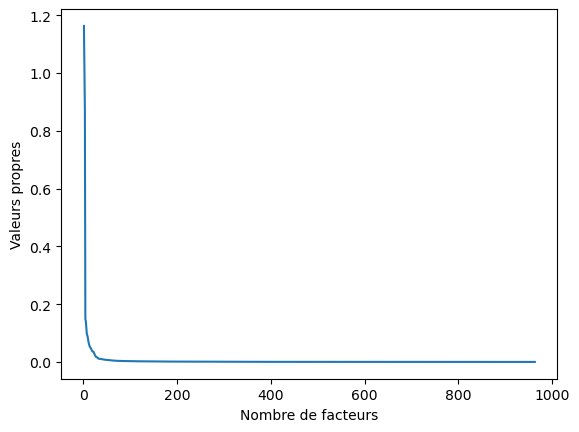

In [74]:
pca.explained_variance_
plt.plot(np.arange(1,964), pca.explained_variance_)
plt.xlabel('Nombre de facteurs')
plt.ylabel("Valeurs propres");

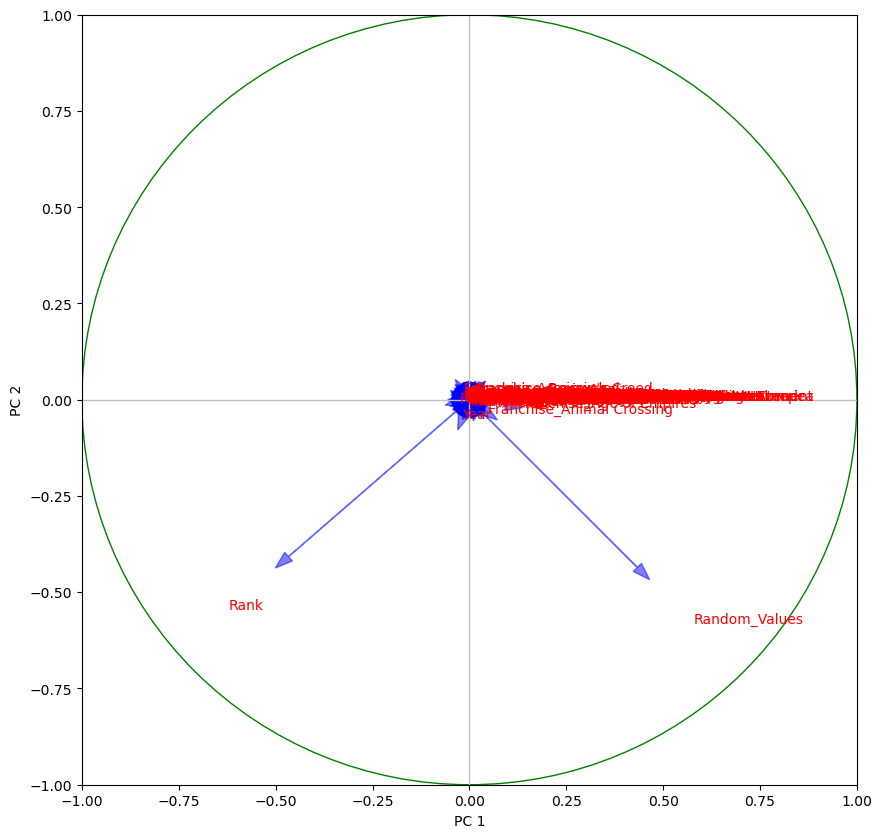

In [75]:
size=len(df_X_train3.columns)
racine_valeurs_propres=np.sqrt(pca.explained_variance_)
corvar=np.zeros((size,size))
for k in range(size):
    corvar[:,k]=pca.components_[:,k]*racine_valeurs_propres[k]
    
fig,axes=plt.subplots(figsize=(10,10))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

for j in range(size):
    plt.annotate(df_X_train3.columns[j],(corvar[j,0]*0.8,corvar[j,1]*0.8), color='red')
    plt.arrow(0,0,corvar[j,0]*0.6, corvar[j,1]*0.6, alpha=0.5, head_width=0.03, color="b")
    
plt.plot([-1,1],[0,0], color="silver", linestyle="-", linewidth=1)
plt.plot([0,0],[-1,1], color="silver", linestyle='-', linewidth=1)

cercle=plt.Circle((0,0),1, color="green",fill=False)
axes.add_artist(cercle)
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()